## 0. Importing libraries
As a first step, we import software packages that we need for our work. This will mainly be numpy for numerical computations, matplotlib for plotting and csv for data input. Please note the short notation of the modules that can be freely chosen (we could also import numpy as supercoolpackaged).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

## 1. data I/O
#### Let's check the content and how it can be loaded!

In [12]:
file_name = 'test.csv'  # input file name (potentially write full path)
with open(file_name, 'r') as file:  # open the file
    reader = csv.reader(file)  # read the opened file with a csv reader.
    for line in reader:  # iterate over all rows
        print('line: ', line)

line:  ['Time', 'value', 'err', 'some-shitty-column']
line:  ['1', '.1', '4', 'asdf']
line:  ['2', '.29', '3', 'f']
line:  ['3', '.31', '5', 'd']
line:  ['4', '.38', '2', 'someshittycol']
line:  ['5', '.55', '4', 'xxx']
line:  ['6', '.6', '5', 'aaaaa']
line:  ['7', '.75', '4', 'sdfw']
line:  ['8', '.79', '52', 'ef']
line:  ['9', '.91', '5', 'bva']
line:  ['10', '1.01', '6', 'df']
line:  ['11', '1.09', '4', 'a1']
line:  ['12', '1.22', '2', '1']


We note that 
- the first line does not contain data but column names
- the lines, encoded in the variable `line`, are actually lists.
- the elements are written in parenthesis, which means they are not stored as numbers but as strings i.e. text format

#### Let's create usable data from the content

To only get our data, we thus have to
- exclude the first line by skipping them using `next`
- save only the first two elements of each line by putting column indices to the list, i.e. `line[0]` for the first element
- convert the string (text format) number into a real number a.k.a. float by `float(string_number)`

In [19]:
file_name = 'test.csv'  # input file name (potentially write full path)
time = []  # create empty lists for the columns
values = []
with open(file_name, 'r') as file:  # open the file
    reader = csv.reader(file)  # read the opened file with a csv reader.
    next(reader) # skip one line
    for line in reader:  # iterate over all rows
        print('line: ', line[0], line[1])
        time.append(float(line[0]))  # append number value to the list
        values.append(float(line[1]))

line:  1 .1
line:  2 .29
line:  3 .31
line:  4 .38
line:  5 .55
line:  6 .6
line:  7 .75
line:  8 .79
line:  9 .91
line:  10 1.01
line:  11 1.09
line:  12 1.22


## 2. Simple plotting

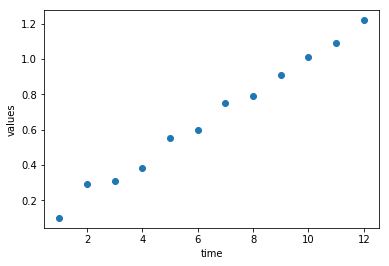

In [24]:
plt.plot(time, values, 'o')  # 'o' is the plotting marker, i.e. dots
plt.xlabel('time')
plt.ylabel('values');

## 3. Linear regression
We can use already existing functions to do the linear regression (actually, most things you might need have already been implemented by someone... google is your friend). We use scipy, a scientific library, to achieve that.

In [26]:
from scipy import stats

Have a look into the manual for more details about `linregress`: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(time, values)

#### print output of linregress

In [39]:
print('slope: ', np.round(slope, 3))
print('intercept: ', np.round(intercept, 3))
print('correlation coeff: ', np.round(r_value, 3))
print('standard deviation: ', np.round(std_err, 3))

slope:  0.098
intercept:  0.032
correlation coeff:  0.996
standard deviation:  0.003


#### plot the result
To plot a function, we have to create arrays of data points from that function first. Just providing the functional form is not enough. Below, you find a simple definition of a function as an example.

In [40]:
def linear_function(x, m, a):
    return m * x + a

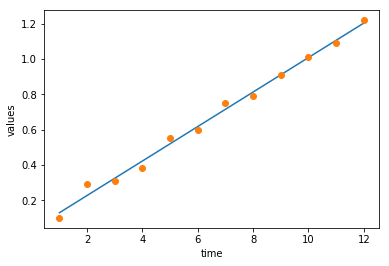

In [44]:
x = np.linspace(1, 12, 100)  # x axis data points
y = linear_function(x, slope, intercept)

plt.plot(x, y)  # plot fit function

# copy pasted first plot:
plt.plot(time, values, 'o')
plt.xlabel('time')
plt.ylabel('values');

## 4. Remarks:
One non-obvious point at this point is that for the sake of simplicity, we have not spoken about data types. In this example, we used python lists and numpy arrays interchangeably. However, there are several very important differences that you should know about. 

##### Python list: `some_list = [1, 2, 3, 4]`
- good: can be defined without knowing how large it will be, i.e. values are simply appended by `some_list.append(some_value)`
- bad: one cannot do math operations on them, i.e. `some_list * another_list` does not work

##### numpy arrays: `some_nparray = np.array([1, 2, 3, 4])`
- good: can do math operations on them, i.e. elementwise multiplication `some_nparray * some_nparray` works.
- bad: appending values is not part of the idea
- functions from numpy or scipy naturally return numpy arrays by default.

##### recommendation:
- use numpy arrays whenever possible. They can be initialized by `np.zeros(length)`.
- if you don't know how, use a list and convert it into a numpy array by `np.array(some_list)`.
- google is your friend